# Importação das bibliotecas

In [82]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Leitura do CSV

In [83]:
# Realiza a leitura do CSV
dataset = pd.read_csv("One_year_compiled.csv")
dataset.head(10)

,timestamp,pCut::Motor_Torque,pCut::CTRL_Position_controller::Lag_error,pCut::CTRL_Position_controller::Actual_position,pCut::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Actual_position,pSvolFilm::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Lag_error,pSpintor::VAX_speed,month,day,hour,sample_Number,mode
0,0.008,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756,1,4,184148.0,0.0,mode1
1,0.012,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756,1,4,184148.0,0.0,mode1
2,0.016,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756,1,4,184148.0,0.0,mode1
3,0.020,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756,1,4,184148.0,0.0,mode1
4,0.024,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756,1,4,184148.0,0.0,mode1
5,0.028,0.355211,0.005552,628392608,-1071.166992,5298605,2521.770996,0.858966,1379.999756,1,4,184148.0,0.0,mode1
6,0.032,0.347946,0.010412,628392604,-1105.499268,5298615,2557.005371,0.888481,1379.999756,1,4,184148.0,0.0,mode1
7,0.036,0.469153,-0.024197,628392600,-1112.365723,5298625,2587.206299,0.918387,1379.999756,1,4,184148.0,0.0,mode1
8,0.040,0.513341,-0.028015,628392595,-1139.831543,5298636,2569.589111,0.910057,1379.999756,1,4,184148.0,0.0,mode1
9,0.044,0.515303,-0.019623,628392591,-1177.597046,5298646,2619.923828,0.972154,1379.999756,1,4,184148.0,0.0,mode1


# Verificação de dados

In [84]:
# ".isna()" - indica se o valor correspondente na DataFrame original é NaN (Not a Number)
# ".sum()" - som a quantidade de True na coluna
dataset.isna().sum()

timestamp                                               0
pCut::Motor_Torque                                      0
pCut::CTRL_Position_controller::Lag_error               0
pCut::CTRL_Position_controller::Actual_position         0
pCut::CTRL_Position_controller::Actual_speed            0
pSvolFilm::CTRL_Position_controller::Actual_position    0
pSvolFilm::CTRL_Position_controller::Actual_speed       0
pSvolFilm::CTRL_Position_controller::Lag_error          0
pSpintor::VAX_speed                                     0
month                                                   0
day                                                     0
hour                                                    0
sample_Number                                           0
mode                                                    0
dtype: int64

In [85]:
# ".info()" - Informações do do dataset
#     Número de entradas não nulas (non-null)
#     Tipos de dados de cada coluna
#     Uso de memória
#     Número total de colunas e linhas
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062912 entries, 0 to 1062911
Data columns (total 14 columns):
 #   Column                                                Non-Null Count    Dtype  
---  ------                                                --------------    -----  
 0   timestamp                                             1062912 non-null  float64
 1   pCut::Motor_Torque                                    1062912 non-null  float64
 2   pCut::CTRL_Position_controller::Lag_error             1062912 non-null  float64
 3   pCut::CTRL_Position_controller::Actual_position       1062912 non-null  int64  
 4   pCut::CTRL_Position_controller::Actual_speed          1062912 non-null  float64
 5   pSvolFilm::CTRL_Position_controller::Actual_position  1062912 non-null  int64  
 6   pSvolFilm::CTRL_Position_controller::Actual_speed     1062912 non-null  float64
 7   pSvolFilm::CTRL_Position_controller::Lag_error        1062912 non-null  float64
 8   pSpintor::VAX_speed             

In [86]:
# ".shape" - Número de linhas e colunas do dataset
dataset.shape

(1062912, 14)

In [87]:
#  colunas numéricas, contagem, média, desvio padrão, mínimo, parcelas e máximo
dataset.describe()

,timestamp,pCut::Motor_Torque,pCut::CTRL_Position_controller::Lag_error,pCut::CTRL_Position_controller::Actual_position,pCut::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Actual_position,pSvolFilm::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Lag_error,pSpintor::VAX_speed,month,day,hour,sample_Number
count,1.062912e+06,1.062912e+06,1.062912e+06,1.062912e+06,1.062912e+06,1.062912e+06,1.062912e+06,1.062912e+06,1.062912e+06,1.062912e+06,1.062912e+06,1.062912e+06,1.062912e+06
mean,4.102069e+00,-1.206338e-01,-5.472746e-05,3.371415e+08,1.945795e+03,1.488169e+08,5.367032e+03,9.847591e-01,1.927328e+03,5.268391e+00,1.653583e+01,1.361880e+05,2.588735e+02
std,2.364827e+00,6.078708e-01,1.212122e-01,5.466868e+08,4.873922e+03,2.711355e+08,3.382194e+03,3.437204e-01,6.559047e+02,3.502912e+00,8.488445e+00,3.225299e+04,1.497494e+02
min,4.000000e-03,-6.560303e+00,-1.888258e+00,-2.039056e+09,-9.482574e+03,1.936250e+05,-2.013385e+01,-9.143658e-01,0.000000e+00,1.000000e+00,1.000000e+00,8.115800e+04,0.000000e+00
25%,2.056000e+00,-3.696310e-01,-2.201461e-02,8.626082e+07,-1.908875e+03,2.136702e+07,3.032669e+03,8.384416e-01,1.500000e+03,2.000000e+00,9.000000e+00,1.113170e+05,1.290000e+02
50%,4.104000e+00,-1.187128e-01,6.456900e-04,1.919407e+08,2.595520e+03,7.259557e+07,4.582979e+03,9.711797e-01,1.800000e+03,4.000000e+00,1.800000e+01,1.348180e+05,2.590000e+02
75%,6.152000e+00,2.546913e-01,2.380830e-02,5.691639e+08,5.441666e+03,1.602507e+08,5.823731e+03,1.105926e+00,2.280000e+03,8.000000e+00,2.300000e+01,1.618270e+05,3.890000e+02
max,8.199999e+00,3.856873e+00,2.021531e+00,1.911789e+09,1.792831e+04,1.453671e+09,1.797202e+04,3.567880e+00,3.600000e+03,1.200000e+01,3.100000e+01,2.232490e+05,5.180000e+02


# Formatação do dataset

In [88]:
# Conversão da coluna 'Mode' para numérico
def convertNonNumeric(dataset):
    # Valores de cada coluna
    columns = dataset.columns.values
    
    for column in columns:
        
        # Dicionário com cada valor numérico para cada texto
        text_digit_vals = {}
        
        # Recebe um texto e converte para numérico
        def convert_to_int (val):
            return text_digit_vals[val]
        
        # Se o valor na coluna não for Float ou Int
        if dataset[column].dtype !=np.int64 and dataset[column].dtype != np.float64:
            
            # Lê os valores da coluna
            column_contents = dataset[column].values.tolist()            
            # Monta uma coleção de elemtnos únicos
            unique_elements = set(column_contents)         
            # Inicia classificação com 0
            x=0
            
            for unique in unique_elements:          
                # Adiciona o valor da classe para o texto no dicionário
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            
            # Mapeia os valores numéricos para os valores de texto nas colunas.
            dataset[column] = list(map(convert_to_int, dataset[column]))
    
    return dataset

clean_dataset = convertNonNumeric(dataset)

In [99]:
clean_dataset.head()

,pCut::Motor_Torque,pCut::CTRL_Position_controller::Lag_error,pCut::CTRL_Position_controller::Actual_position,pCut::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Actual_position,pSvolFilm::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Lag_error,pSpintor::VAX_speed,mode
0,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756,2
1,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756,2
2,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756,2
3,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756,2
4,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756,2


<Axes: >

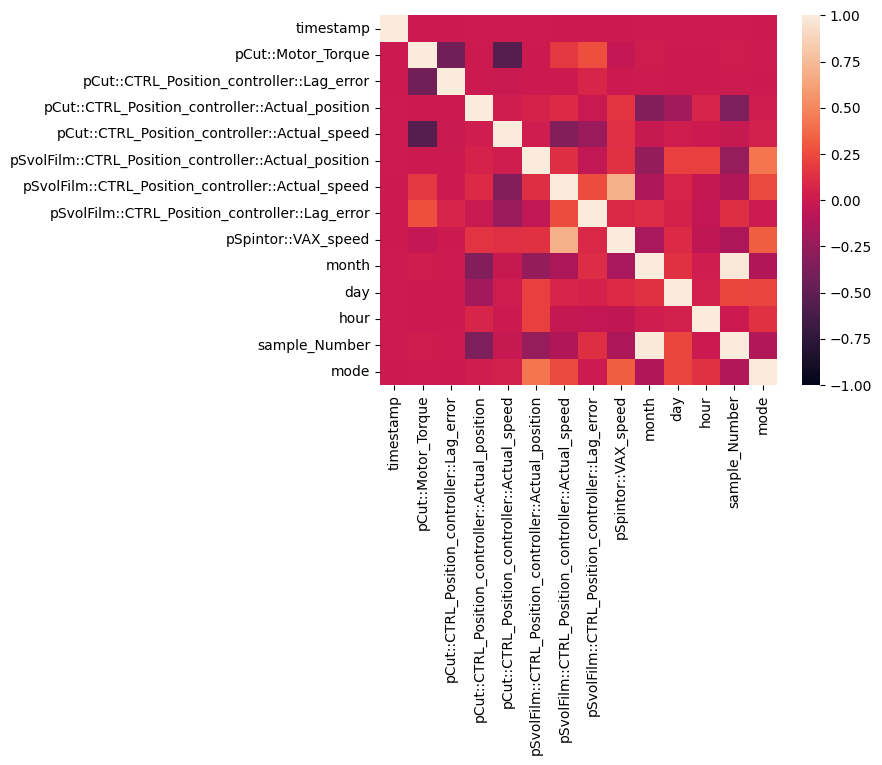

In [98]:
# Mapa de calor correlacional
sns.heatmap(dataset.corr(), vmin= -1, vmax = 1)

In [89]:
# Remove colunas que não serão utilizadas
clean_dataset = clean_dataset.drop(columns=['day', 'hour', 'sample_Number', 'month', 'timestamp'])

In [90]:
# Imprime tabela com alterações
clean_dataset.head(10)

,pCut::Motor_Torque,pCut::CTRL_Position_controller::Lag_error,pCut::CTRL_Position_controller::Actual_position,pCut::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Actual_position,pSvolFilm::CTRL_Position_controller::Actual_speed,pSvolFilm::CTRL_Position_controller::Lag_error,pSpintor::VAX_speed,mode
0,0.199603,0.027420,628392628,-920.104980,5298555,2441.235352,0.899543,1379.999756,2
1,0.281624,0.002502,628392625,-937.271118,5298565,2453.819092,0.874072,1379.999756,2
2,0.349315,-0.018085,628392621,-951.004028,5298575,2476.469727,0.879806,1379.999756,2
3,0.444450,-0.054680,628392617,-1019.668579,5298585,2501.637207,0.837500,1379.999756,2
4,0.480923,-0.042770,628392613,-1023.101807,5298595,2519.254395,0.905347,1379.999756,2
5,0.355211,0.005552,628392608,-1071.166992,5298605,2521.770996,0.858966,1379.999756,2
6,0.347946,0.010412,628392604,-1105.499268,5298615,2557.005371,0.888481,1379.999756,2
7,0.469153,-0.024197,628392600,-1112.365723,5298625,2587.206299,0.918387,1379.999756,2
8,0.513341,-0.028015,628392595,-1139.831543,5298636,2569.589111,0.910057,1379.999756,2
9,0.515303,-0.019623,628392591,-1177.597046,5298646,2619.923828,0.972154,1379.999756,2


- pCut::Motor_Torque - Torque em nM
- pCut::CTRL_Position_controller::Lag_error - Representa o erro de posição instantânea entre o ponto de ajuste e a posição atual real do motor
- pCut::CTRL_Position_controller::Actual_position - Posição da lâmina de corte em mm
- pCut::CTRL_Position_controller::Actual_speed - Velocidade da lâmina de corte

- pSvolFilm::CTRL_Position_controller::Actual_position - Posição do desbobinador de filme plástico em mm
- pSvolFilm::CTRL_Position_controller::Actual_speed - Velocidade do desbobinador de filme plástico
- pSvolFilm::CTRL_Position_controller::Lag_error - Representa o erro de posição instantânea entre o ponto de ajuste e a posição atual real do motor

- pSpintor::VAX_speed - Medição de desempenho VAX (velocidade)

<Axes: >

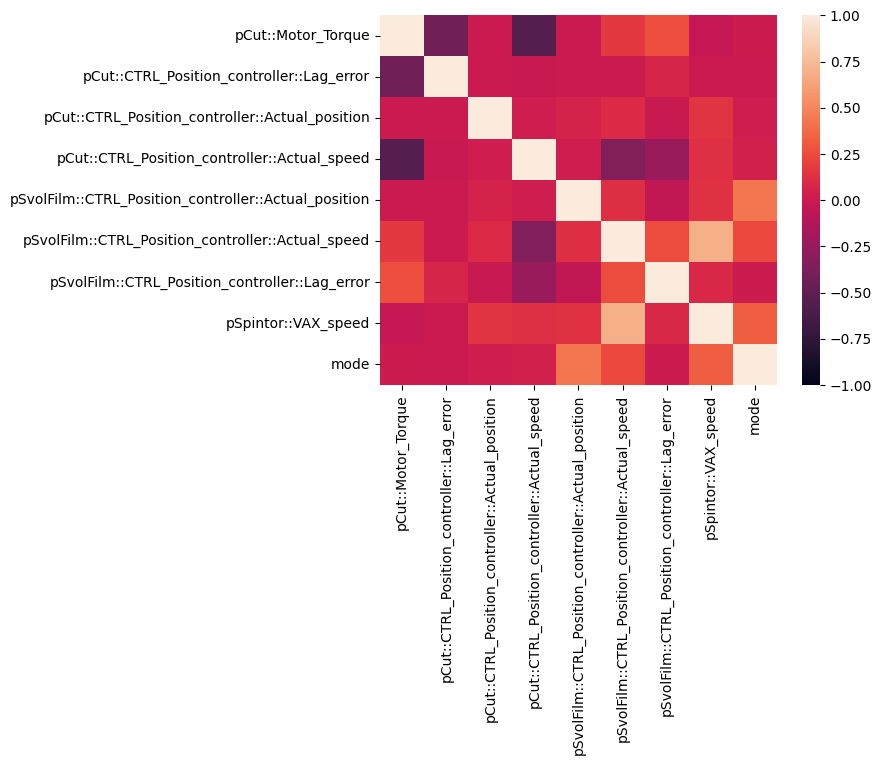

In [91]:
# Mapa de calor correlacional
sns.heatmap(clean_dataset.corr(), vmin= -1, vmax = 1)

# SVM

- Implementação do OneClassSVM, utilizada para tarefas de detecção de anomalias.

In [92]:
# Atribui o clean_dataset à variável X
X = clean_dataset

# Cria um objeto MinMaxScaler do módulo preprocessing
scaler = preprocessing.MinMaxScaler()

# Transforma os dados usando a escala Min-Max e sobrescreve o DataFrame original X
X = pd.DataFrame(scaler.fit_transform(X), 
                              columns=X.columns, 
                              index=X.index)

# Padroniza os dados usando a normalização z-score.
X = preprocessing.scale(X)

# Seleciona as primeiras 200.000 linhas dos dados padronizados como conjunto de treinamento.
X_train = X[:200000]

# Cria um objeto OneClassSVM (Máquina de Vetores de Suporte para Classificação de Uma Classe) com parâmetros especificados (nu=0.25 e gamma=0.05).
ocsvm = OneClassSVM(nu=0.25, gamma=0.05)

# Ajusta o modelo OneClassSVM usando os dados de treinamento X_train.
ocsvm.fit(X_train)

OneClassSVM(gamma=0.05, nu=0.25)

In [93]:
dataset_anomaly=clean_dataset.copy()
dataset_anomaly['anomaly'] = pd.Series(ocsvm.predict(X))

In [94]:
# Salvando Dataset.
dataset_anomaly.to_csv('Labled_df.csv')

# Plotando anomalias

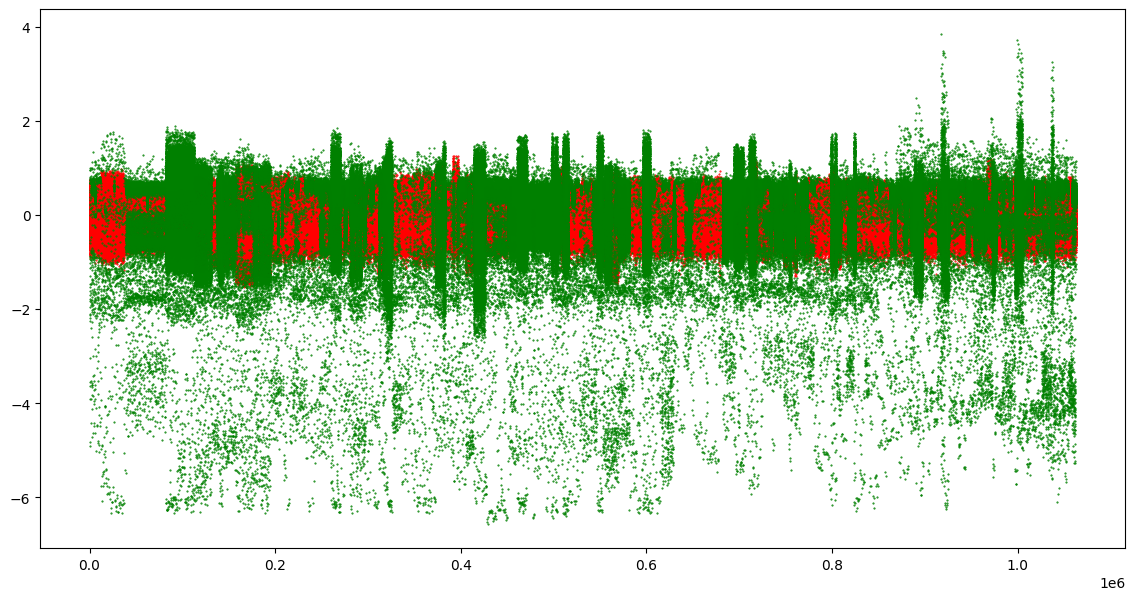

In [95]:
# Lendo agrupamentos
scat_1 = dataset_anomaly.groupby('anomaly').get_group(1)
scat_0 = dataset_anomaly.groupby('anomaly').get_group(-1)

plt.subplots(figsize=(14,7))

# Grupo 1, plotando verde
plt.plot(scat_1.index,scat_1['pCut::Motor_Torque'], 'r.', markersize=1)

# Grupo -1, plotando vermelho
plt.plot(scat_0.index, scat_0['pCut::Motor_Torque'],'g.', markersize=1)

# Métricas

In [96]:
# Rótulos verdadeiros
true_labels = dataset_anomaly['anomaly']

# Rótulos previstos pelo modelo
predicted_labels = dataset_anomaly['anomaly']

# Calcula a matriz de confusão
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calcula precisão, revocação e F1-Score
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print("Matriz de Confusão:")
print(conf_matrix)
print("Precisão:", precision)
print("Revocação:", recall)
print("F1-Score:", f1)

Matriz de Confusão:
[[328070      0]
 [     0 734842]]
Precisão: 1.0
Revocação: 1.0
F1-Score: 1.0
